In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
#下载数据
train_data=datasets.CIFAR10(root='cifar10/',train=True,transform=transforms.ToTensor(),download=True)
test_data=datasets.CIFAR10(root='cifar10/',train=False,transform=transforms.ToTensor(),download=True)
print("-"*40)

Files already downloaded and verified
Files already downloaded and verified
----------------------------------------


In [41]:
#输出图像，找一张图片，然后输出图像
import matplotlib.pyplot as plt
temp=train_data[1][0].numpy()
print(temp.shape)
temp=temp.transpose(1,2,0)#转化一下矩阵维度从次序
print(temp.shape)

(3, 32, 32)
(32, 32, 3)


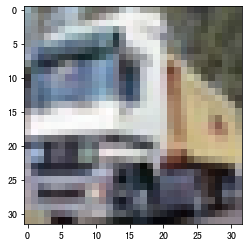

In [42]:
plt.imshow(temp)

In [44]:
import torchvision
from torch.utils.data import DataLoader
#使用DataLoader进行分批
train_loader=DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)
test_loader=DataLoader(dataset=test_data,batch_size=BATCH_SIZE)

In [45]:
#使用ResNet
model=torchvision.models.resnet18(pretrained=True)

In [46]:
import time
#定义损失函数
criterion=nn.CrossEntropyLoss()
#定义优化器
optimizer=optim.Adam(model.parameters(),lr=LR)
#定义device
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [50]:
#先定义一些超参数
EPOCH=3;
BATCH_SIZE=64;
LR=0.001

In [51]:
#开始训练
for epoch in range(EPOCH):
    start_time=time.time()
    for i,data in enumerate(train_loader):
        inputs,labels=data
        inputs,labels=inputs.to(device),labels.to(device)
        #前向传播
        outputs=model(inputs)
        #计算损失函数
        loss=criterion(outputs,labels)
        #清空上一轮的梯度
        optimizer.zero_grad()
        #反向传播
        loss.backward()
        #参数更新
        optimizer.step()
        
    print('步数：{}   loss:{}   运行时间:{}'.format(epoch+1,loss.item() ,time.time()-start_time ) )

步数：1   loss:0.7081732749938965   运行时间:214.68737602233887
步数：2   loss:0.6138265132904053   运行时间:220.09270858764648
步数：3   loss:0.7486114501953125   运行时间:219.9434084892273


In [52]:
#保存训练模型
file_name='cifar10_reset_pt'
torch.save(model,file_name)
print("模型{}已经保存完毕".format(file_name))

模型cifar10_reset_pt已经保存完毕


In [53]:
#测试
model=torch.load(file_name)
model.eval()

correct,total=0,0
for data in test_loader:
    images,labels=data
    images,labels=images.to(device),labels.to(device)
    #前向传播
    out=model(images)
    #预测结果
    _,predicted=torch.max(out.data,1)
    #判断结果与实际结果是否一致
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()

#输出识别的准确率
print("识别的准确率：{}".format(correct/total))

识别的准确率：0.7792
